# MultiArm Bandit Problem (MAB)
The Multi-Armed Bandit (MAB) problem is a classic challenge in reinforcement learning. In this scenario, each slot machine represents a bandit with one lever (arm). Pulling the lever yields a reward according to a specific probability distribution. When dealing with just one slot machine, it is referred to as a one-armed bandit. When multiple slot machines are involved, it is termed a Multi-Armed Bandit (MAB) or k-armed bandit, where k indicates the number of slot machines.

## Upper-Confidence-Bound (UCB) Strategy
The idea of this upper confidence bound (UCB) action selection is that the square-root
term is a measure of the uncertainty or variance in the estimate of $a ’ s$ value. The quantity
being maxed over is thus a sort of upper bound on the possible true value of action $a$ , with
$c$ determining the confidence level. Each time a is selected the uncertainty is presumably
reduced: $N$<sub>t</sub>$( a )$ increments, and, as it appears in the denominator, the uncertainty term
decreases. On the other hand, each time an action other than $a$ is selected, $t$ increases but
$N$<sub>t</sub>$( a )$ does not; because t appears in the numerator, the uncertainty estimate increases.
The use of the natural logarithm means that the increases get smaller over time, but are
unbounded; all actions will eventually be selected, but actions with lower value estimates,
or that have already been selected frequently, will be selected with decreasing frequency
over time.

### Importing required libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Parameter declration

In [2]:
# Parameters
k = 10  # Number of arms
steps = 10000 # Number of steps
c = 2  # Exploration parameter

### UCB MAB Model

In [3]:
class MultiArmedBanditUCB:
    def __init__(self, k, steps, c):
        self.k = k  # Number of arms
        self.steps = steps  # Number of steps
        self.c = c  # Exploration parameter
        self.q_true = np.random.randn(k)  # True reward distribution for each arm
        self.q_estimates = np.zeros(k)  # Estimated reward for each arm
        self.action_counts = np.zeros(k)  # Number of times each arm is pulled
        self.total_reward = 0  # Total reward accumulated
        self.average_rewards = np.zeros(steps)  # Average reward at each step

    def select_action(self, step):
        if step < self.k:
            return step  # Ensure each arm is pulled at least once
        ucb_values = self.q_estimates + self.c * np.sqrt(np.log(step + 1) / (self.action_counts + 1e-5))
        return np.argmax(ucb_values)

    def update_estimates(self, action, reward):
        self.action_counts[action] += 1
        self.q_estimates[action] += (reward - self.q_estimates[action]) / self.action_counts[action]

    def step(self, step_num):
        action = self.select_action(step_num)
        reward = np.random.randn() + self.q_true[action]
        self.update_estimates(action, reward)
        self.total_reward += reward
        self.average_rewards[step_num] = self.total_reward / (step_num + 1)

    def run(self):
        for step in range(self.steps):
            self.step(step)
        return self.average_rewards

    def plot_results(self):
        plt.plot(self.average_rewards)
        plt.xlabel('Steps')
        plt.ylabel('Average Reward')
        plt.title(f'UCB Strategy: c={self.c}')
        plt.show()

### Plotting the result

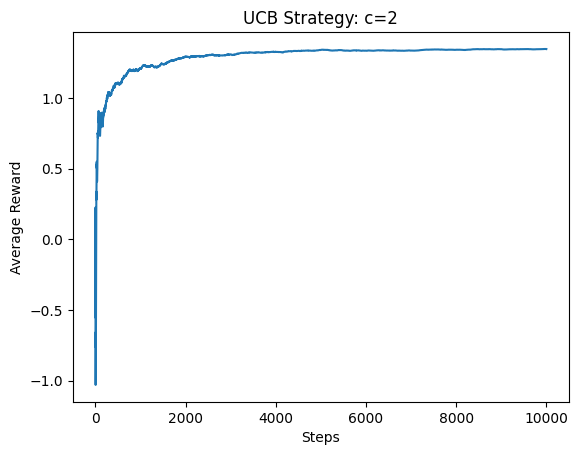

In [4]:
# Run the MAB simulation with UCB
mab_ucb = MultiArmedBanditUCB(k, steps, c)
mab_ucb.run()
mab_ucb.plot_results()
